<a href="https://colab.research.google.com/github/JavierElizondo1/Coder-Data-Science2/blob/main/MBA_CLASIFICATION_JAVIER_ELIZONDO_TREVINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA Admission

# 1. Abstracto con motivación y audiencia


## Motivación:
El proceso de admisión universitaria es crucial tanto para las instituciones educativas como para los aspirantes. Analizar los datos de admisión puede ayudar a identificar patrones y factores clave que influyen en la decisión de admitir o rechazar a un estudiante. Este análisis no solo optimiza el proceso de selección, sino que también promueve la equidad y la transparencia en las decisiones de admisión.

## Audiencia:

**Administradores y Oficiales de Admisión Universitaria**: Para mejorar y optimizar los criterios de selección.
**Estudiantes y Aspirantes**: Para entender mejor los factores que influyen en su admisión.
**Investigadores y Científicos de Datos**: Para desarrollar modelos predictivos y análisis de datos en el ámbito educativo.
**Policymakers**: Para formular políticas educativas basadas en datos.


# 2. Resumen de metadata

*   application_id: Identificador único para cada solicitud
*   gender: Género del solicitante (Masculino, Femenino)
*   international: Estudiante internacional (VERDADERO/FALSO)
*   gpa: Promedio de calificaciones del solicitante (en una escala de 4.0)
*   major: Carrera de pregrado (Negocios, STEM, Humanidades)
*   race: Antecedentes raciales del solicitante (por ejemplo, Blanco, Negro, Asiático, Hispano, Otro / estudiante internacional)
*   gmat: Puntuación GMAT del solicitante (800 puntos)
*   work_exp: Número de años de experiencia laboral (Años)
*   work_industry: Industria de la experiencia laboral previa del solicitante (por ejemplo, Consultoría, Finanzas, Tecnología, etc.)
*   admission: Estado de admisión (Admitido, Lista de espera, Rechazado)


# Importar las bibliotecas necesarias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings("ignore")


# Cargar y explorar el dataset

In [5]:
# Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/JavierElizondo1/Coder-Data-Science2/cd43a849867be2e1090e341d9def7be32f2609fd/MBA.csv')
#The URL has been updated to point to the raw content of the CSV file.

In [6]:
# Mostrar las primeras filas del dataset
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680,5,Investment Management,Deny
2,3,Female,True,3.30,Business,International,710,5,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690,6,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590,5,Consulting,Deny


# Información general del dataset

In [7]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   int64  
 7   work_exp        6194 non-null   int64  
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 441.7+ KB


# Estadísticas descriptivas

In [8]:
# Estadísticas descriptivas
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


# Verificar valores nulos

In [9]:
# Verificar valores nulos
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


# Lista de Preguntas y/o Hipótesis

## Hipótesis 1:
Los estudiantes con un GPA más alto tienen una mayor probabilidad de ser admitidos.

## Hipótesis 2:
Los estudiantes con puntajes GMAT más altos tienen una mayor probabilidad de ser admitidos.

## Hipótesis 3:
La experiencia laboral en ciertas industrias (e.g., Consultoría, Tecnología) aumenta la probabilidad de admisión.

## Hipótesis 4:
Los estudiantes internacionales tienen diferentes tasas de admisión en comparación con los estudiantes nacionales.



# Resumen de Hallazgos del Proyecto

## Distribución de Admisiones por Género:
Las mujeres tienen una tasa de admisión relativamente alta en comparación con los hombres, y son admitidas con menor relacion de GPA y GMAT.

## Impacto del GPA:
Los estudiantes con un GPA de 3.5 o más tienen una mayor probabilidad de ser admitidos.

## Puntaje GMAT:
Un puntaje GMAT alto (700 o más) tiene una mayor probabilidad de admisión.

## Estudiantes Internacionales:
Los estudiantes internacionales con buenos puntajes en el GMAT y un GPA alto tienen una mayor probabilidad de ser admitidos.

## Experiencia Laboral:
La experiencia laboral en industrias como Investment Management y Financial Services parece aumentar la probabilidad de admisión, especialmente cuando se combina con un buen GPA y puntaje GMAT.

## Raza y Admisión:
Los estudiantes Nacionales tienen mayor probabilidad de ser aceptados que los Internacionales. y dentro de los estudiantes nacionales los blancos y asiáticos con buenos puntajes en el GMAT y GPA altos tienen una mayor probabilidad de ser admitidos.


# Preprocesamiento de datos

# Análisis exploratorio de datos (EDA)

# Primero revisaremos la cantidad de aplicantes.

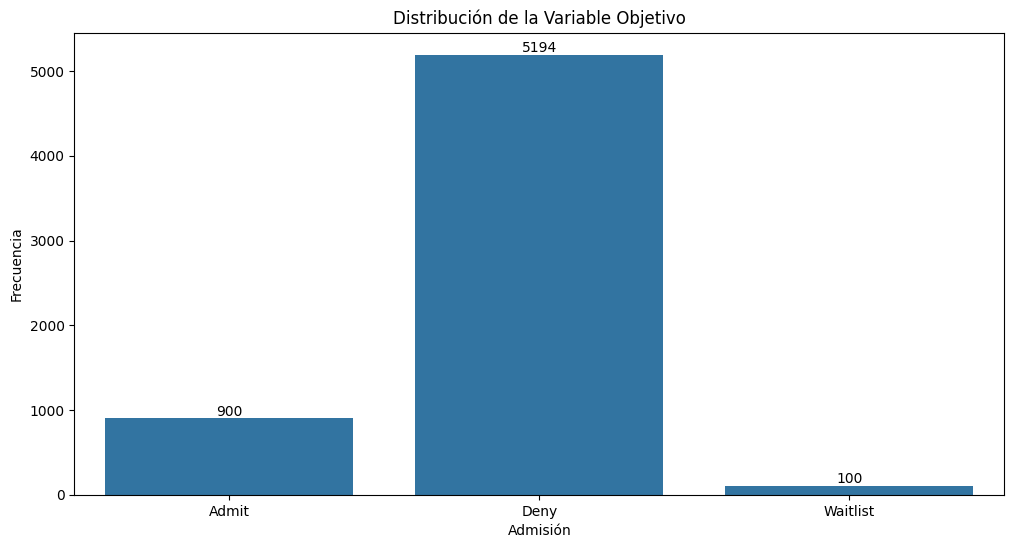

In [70]:
# Distribución de la variable objetivo
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='admission', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Admisión')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable Objetivo')
plt.show()

# Cuantos son Mujeres y Hombres.

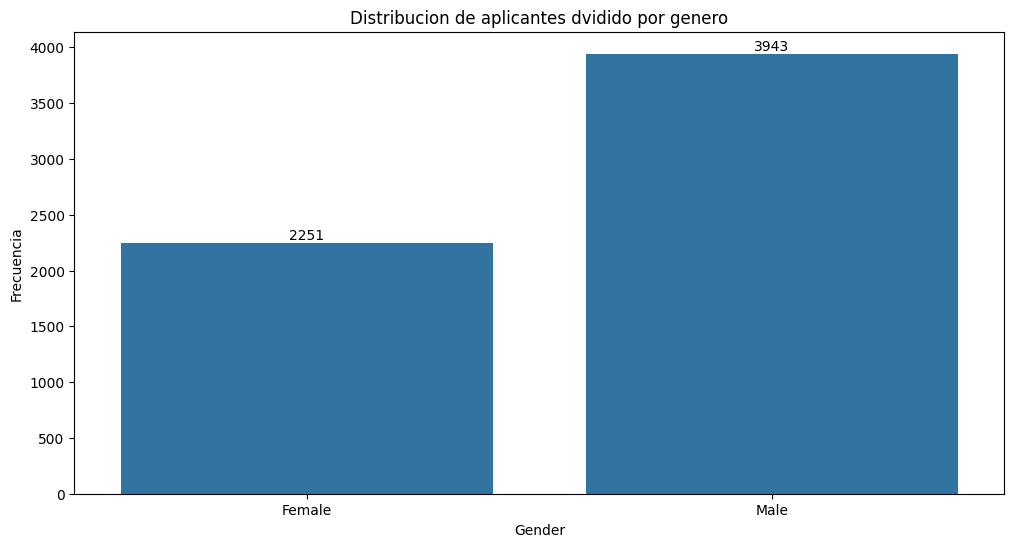

In [71]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='gender', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Gender')
plt.ylabel('Frecuencia')
plt.title('Distribucion de aplicantes dvidido por genero')
plt.show()

# Cuantas admisiones se tuvieron por genero.

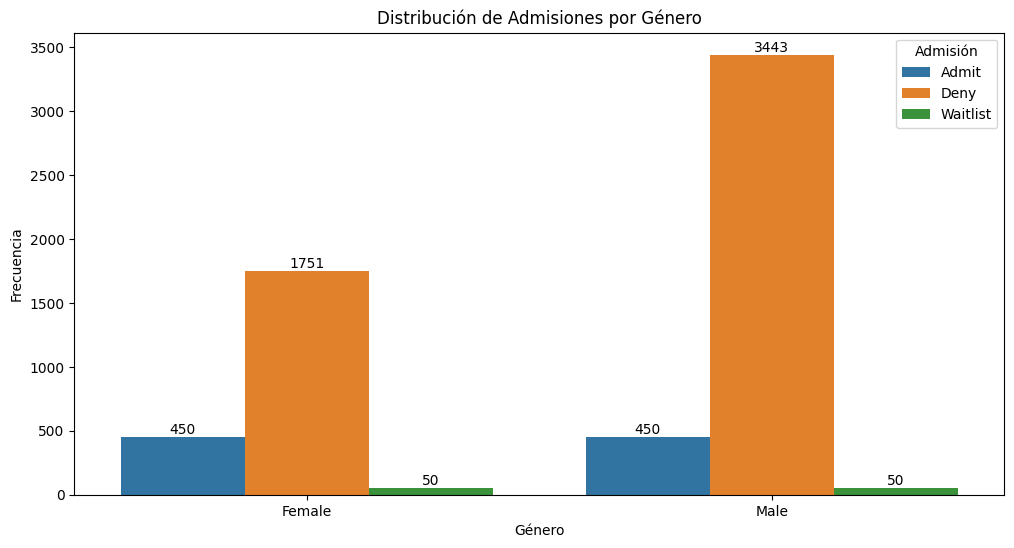

In [72]:
# Distribución de admisiones por género
plt.figure(figsize=(12, 6))
ax=sns.countplot(x='gender', hue='admission', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.legend(title='Admisión')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Distribución de Admisiones por Género')
plt.show()

In [53]:
# Tasa de admision de Mujeres

# Filter the DataFrame to include only male applicants
Female_applicants = df[df['gender'] == 'Female']

# Count the number of male applicants admitted
admit_Females = Female_applicants[Female_applicants['admission'] == 'Admit'].shape[0]

# Count the total number of male applicants
total_Females = Female_applicants.shape[0]

# Calculate the percentage of admitted males
percentage_admitted_Females = (admit_Females / total_Females) * 100

print(f"Percentage of admitted Females: {percentage_admitted_Females:.2f}%")

Percentage of admitted Females: 19.99%


In [51]:
# Tasa de admision de Hombres

# Filter the DataFrame to include only male applicants
male_applicants = df[df['gender'] == 'Male']

# Count the number of male applicants admitted
admit_males = male_applicants[male_applicants['admission'] == 'Admit'].shape[0]

# Count the total number of male applicants
total_males = male_applicants.shape[0]

# Calculate the percentage of admitted males
percentage_admitted_males = (admit_males / total_males) * 100

print(f"Percentage of admitted males: {percentage_admitted_males:.2f}%")


Percentage of admitted males: 11.41%


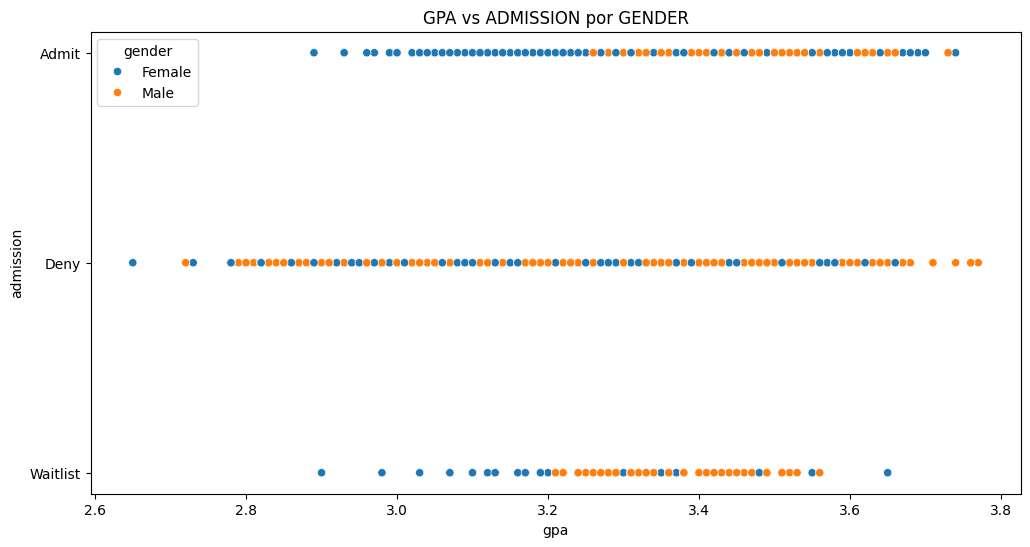

In [96]:
# Comparativa de admision po GPA de estudiantes dividido por Genero
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gpa', y='admission', hue='gender', data=df)
plt.title('GPA vs ADMISSION por GENDER')
plt.show()

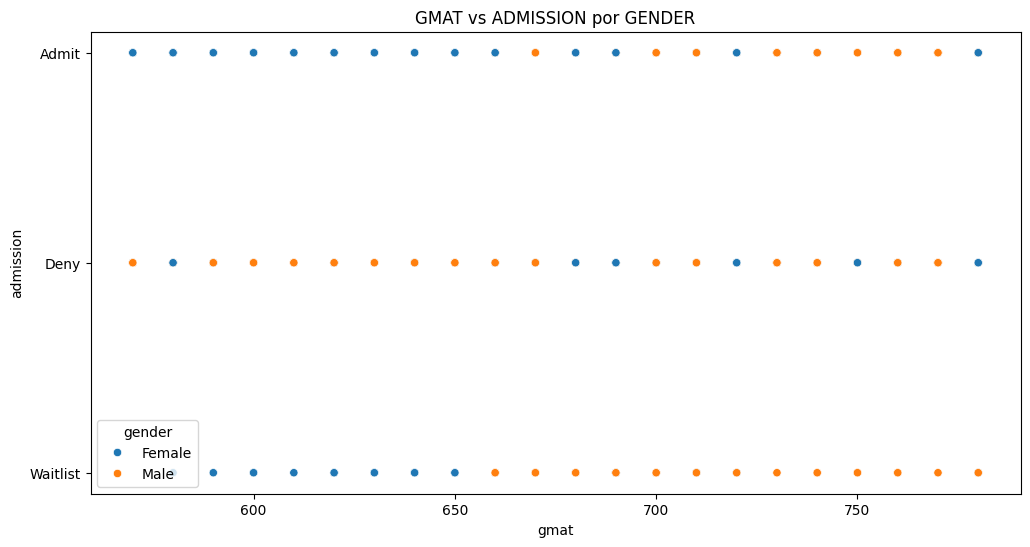

In [95]:
# Comparativa de admision po GMAT de estudiantes dividido por Genero
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gmat', y='admission', hue='gender', data=df)
plt.title('GMAT vs ADMISSION por GENDER')
plt.show()

# # Hipótesis 1: Los estudiantes con un GPA más alto tienen una mayor probabilidad de ser admitidos?


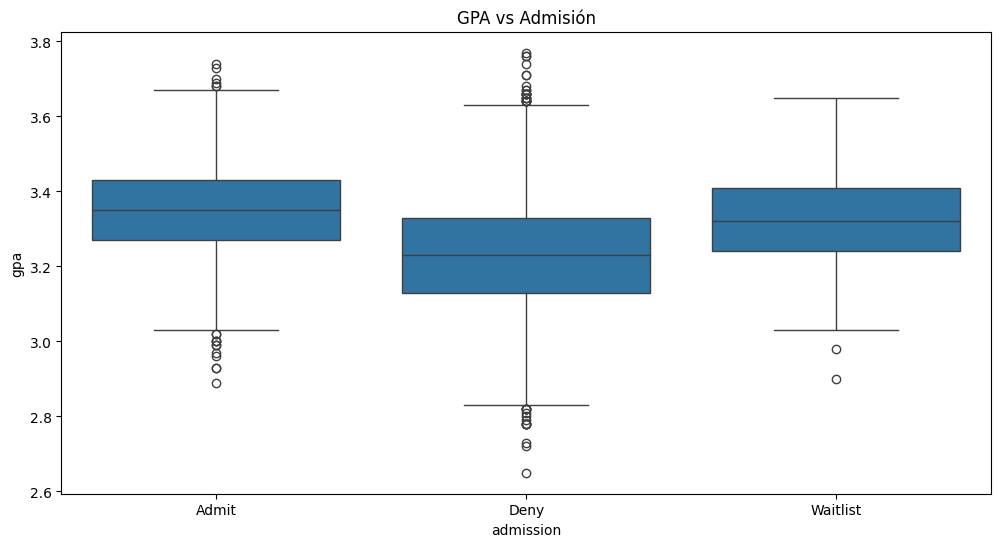

In [73]:
# Hipótesis 1: Los estudiantes con un GPA más alto tienen una mayor probabilidad de ser admitidos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='admission', y='gpa', data=df)
plt.title('GPA vs Admisión')
plt.show()

# Hipótesis 2: Los estudiantes con puntajes GMAT más altos tienen una mayor probabilidad de ser admitidos?


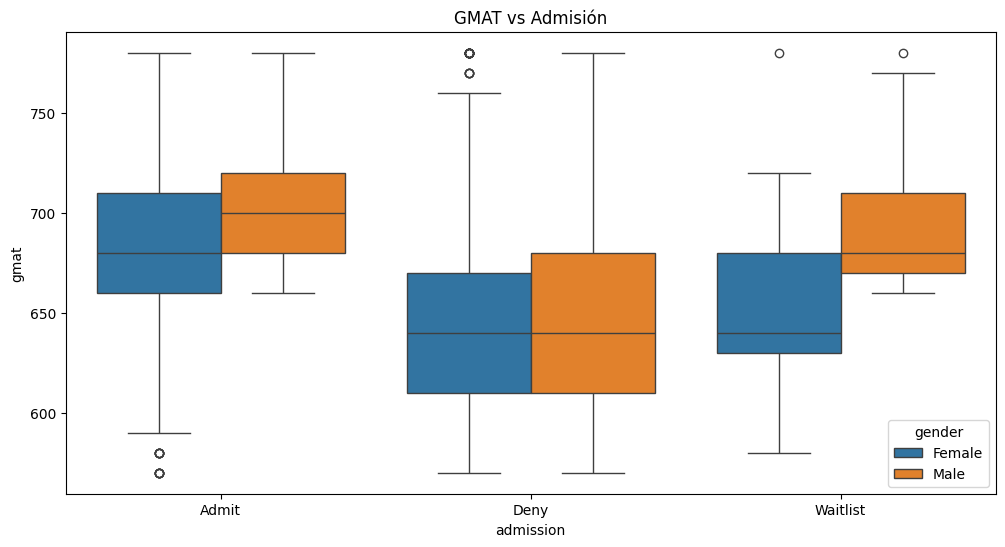

In [74]:
# Hipótesis 2: Los estudiantes con puntajes GMAT más altos tienen una mayor probabilidad de ser admitidos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='admission', y='gmat', hue='gender', data=df)
plt.title('GMAT vs Admisión')
plt.show()

# Hipótesis 3: La experiencia laboral en ciertas industrias (e.g., Consultoría, Tecnología) aumenta la probabilidad de admisión?

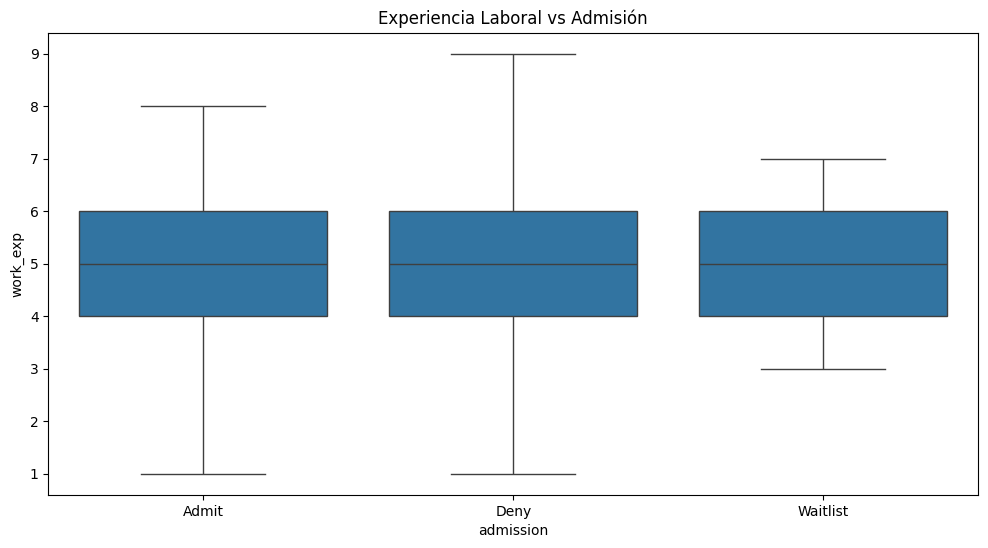

In [75]:
# Hipótesis 3: La experiencia laboral en ciertas industrias (e.g., Consultoría, Tecnología) aumenta la probabilidad de admisión.
plt.figure(figsize=(12, 6))
sns.boxplot(x='admission', y='work_exp', data=df)
plt.title('Experiencia Laboral vs Admisión')
plt.show()

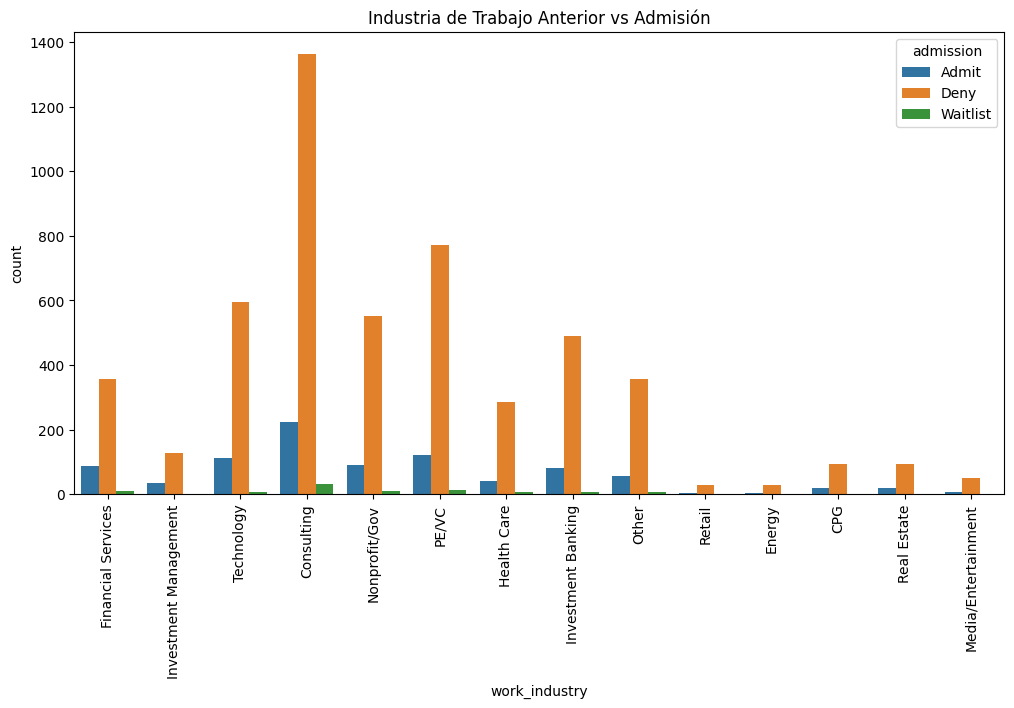

In [76]:
# Industria de trabajo anterior vs Admisión
plt.figure(figsize=(12, 6))
sns.countplot(x='work_industry', hue='admission', data=df)
plt.title('Industria de Trabajo Anterior vs Admisión')
plt.xticks(rotation=90)
plt.show()

work_industry
Investment Management    0.216867
Financial Services       0.190687
CPG                      0.175439
Real Estate              0.162162
Technology               0.156425
Name: admission, dtype: float64


work_industry
PE/VC                  0.134509
Retail                 0.121212
Health Care            0.119760
Media/Entertainment    0.118644
Energy                 0.093750
Name: admission, dtype: float64




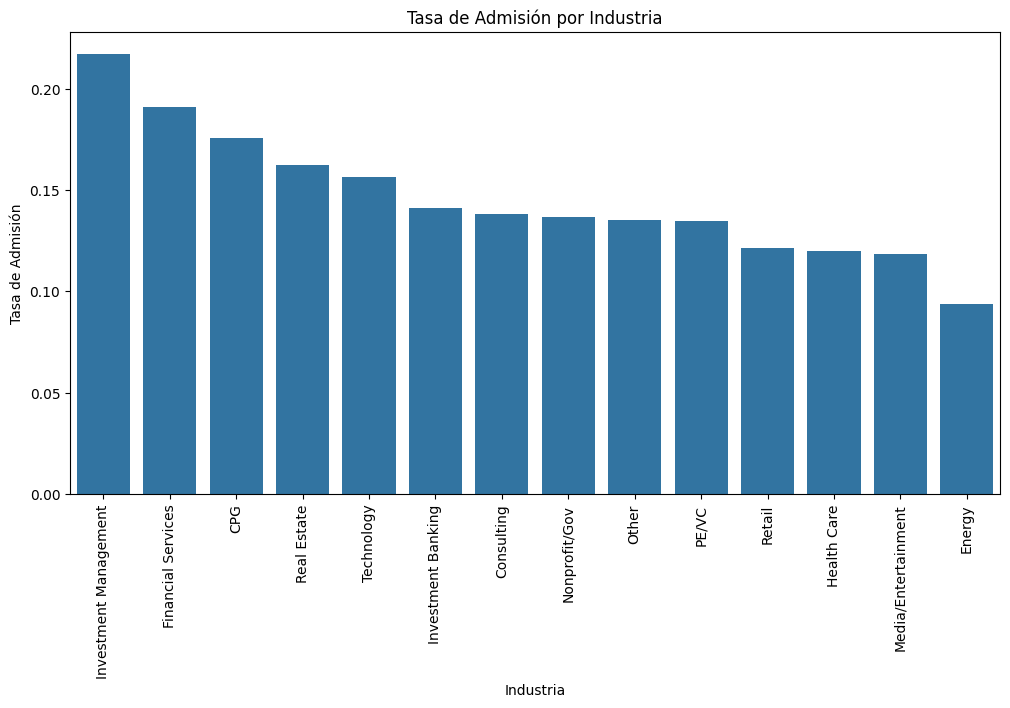

In [77]:
# La experiencia laboral en industrias como Investment Management y Financial Services parece aumentar la probabilidad de admisión.

# Agrupar por industria y calcular la tasa de admisión
admission_rates_by_industry = df.groupby('work_industry')['admission'].apply(lambda x: (x == 'Admit').mean()).sort_values(ascending=False)

# Mostrar las industrias con las tasas de admisión más altas
print(admission_rates_by_industry.head(5))
print('\n')

# Mostrar las industrias con las tasas de admisión más bajas
print(admission_rates_by_industry.tail(5))
print('\n')

# Crear un gráfico de barras para visualizar las tasas de admisión por industria
plt.figure(figsize=(12, 6))
sns.barplot(x=admission_rates_by_industry.index, y=admission_rates_by_industry.values)
plt.xticks(rotation=90)
plt.xlabel('Industria')
plt.ylabel('Tasa de Admisión')
plt.title('Tasa de Admisión por Industria')
plt.show()


# Hipótesis 4: Los estudiantes internacionales tienen diferentes tasas de admisión en comparación con los estudiantes nacionales?

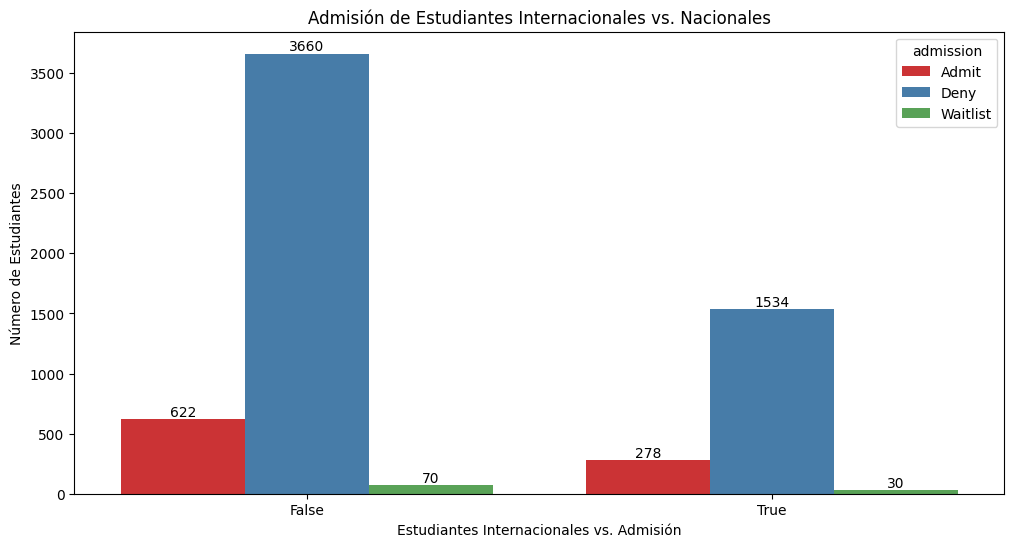

In [80]:
# Hipótesis 4: Los estudiantes internacionales tienen diferentes tasas de admisión en comparación con los estudiantes nacionales.
plt.figure(figsize=(12, 6))
ax= sns.countplot(x='international', hue='admission', data=df, palette='Set1')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xlabel('Estudiantes Internacionales vs. Admisión')
plt.ylabel('Número de Estudiantes')
plt.title('Admisión de Estudiantes Internacionales vs. Nacionales')
plt.show()

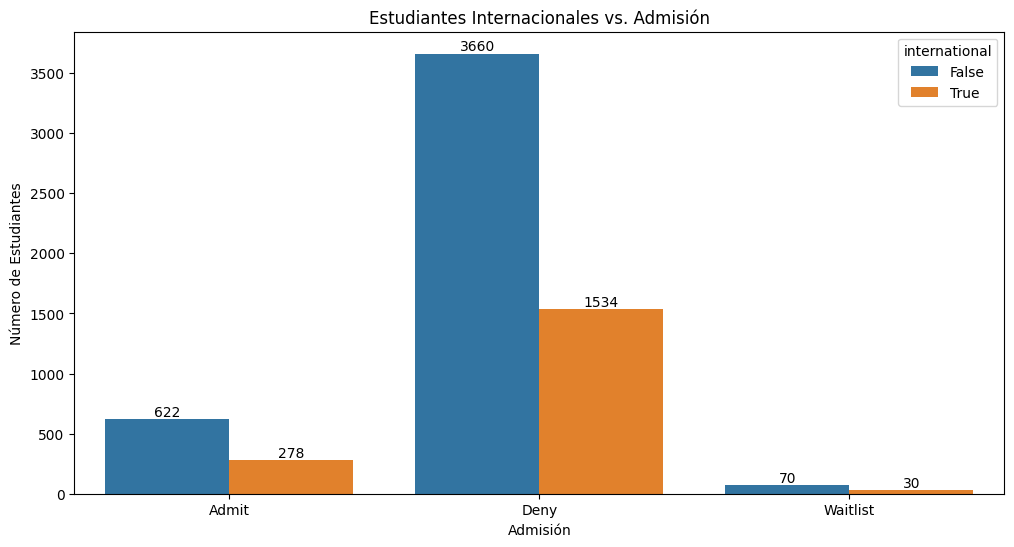

In [81]:
# Hipótesis 4: Estudiantes internacionales vs. Admisión
plt.figure(figsize=(12, 6))
ax= sns.countplot(x='admission', hue='international', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Admisión')
plt.ylabel('Número de Estudiantes')
plt.title('Estudiantes Internacionales vs. Admisión')
plt.show()

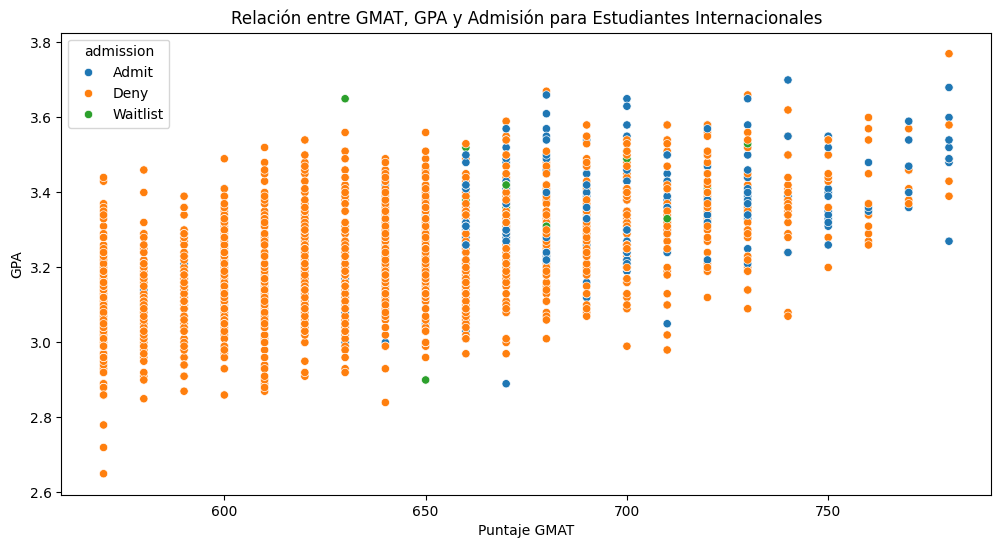

Tasa de admisión para estudiantes internacionales con alto GMAT y GPA:# 45.90%


In [91]:
# Los estudiantes internacionales con buenos puntajes en el GMAT y un GPA alto tienen una mayor probabilidad de ser admitidos

# Filtrar los estudiantes internacionales
international_students = df[df['international'] == True]

# Crear un diagrama de dispersión para visualizar la relación entre GMAT, GPA y admisión para estudiantes internacionales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gmat', y='gpa', hue='admission', data=international_students)
plt.title('Relación entre GMAT, GPA y Admisión para Estudiantes Internacionales')
plt.xlabel('Puntaje GMAT')
plt.ylabel('GPA')
plt.show()

# Calcular la tasa de admisión para estudiantes internacionales con altos puntajes de GMAT y GPA
high_gmat_gpa_international = international_students[(international_students['gmat'] >= 700) & (international_students['gpa'] >= 3.5)]
admitted_high_gmat_gpa_international = high_gmat_gpa_international[high_gmat_gpa_international['admission'] == 'Admit'].shape[0]
total_high_gmat_gpa_international = high_gmat_gpa_international.shape[0]

if total_high_gmat_gpa_international > 0:
  admission_rate_high_gmat_gpa_international = (admitted_high_gmat_gpa_international / total_high_gmat_gpa_international) * 100
  print(f"Tasa de admisión para estudiantes internacionales con alto GMAT y GPA: {admission_rate_high_gmat_gpa_international:.2f}%")
else:
  print("No hay estudiantes internacionales con alto GMAT y GPA en el conjunto de datos.")


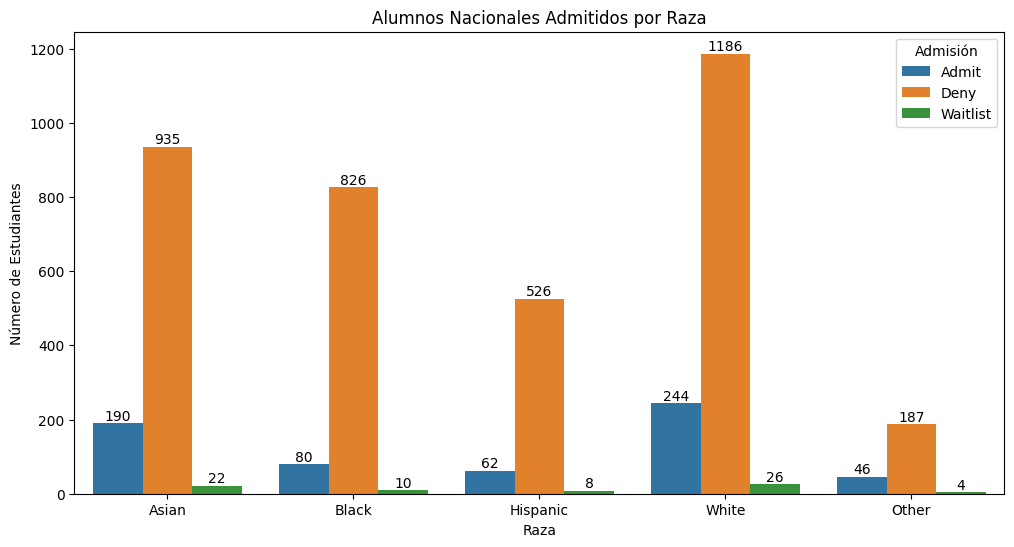

In [82]:
# Alumnos nacionales admitidos por raza

# Filtrar por alumnos nacionales
national_students = df[df['international'] == 0]

# Grafico de Alumnos nacionales admitidos por raza
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='race', hue='admission' , data=national_students)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xlabel('Raza')
plt.ylabel('Número de Estudiantes')
plt.title('Alumnos Nacionales Admitidos por Raza')
plt.legend(title='Admisión')
plt.show()


race
White       0.167582
Asian       0.165650
Hispanic    0.104027
Black       0.087336
Name: admission, dtype: float64




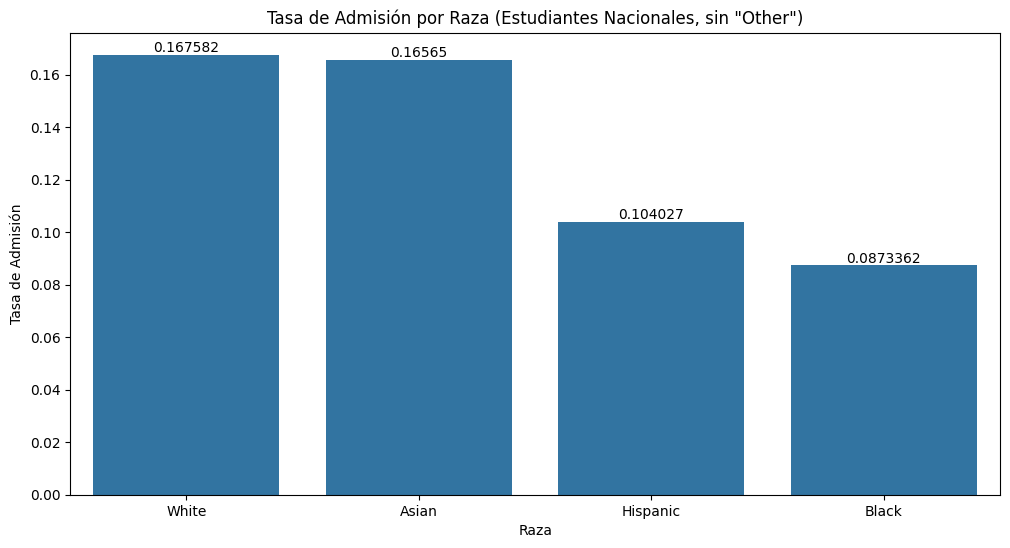

In [94]:
# Tasa de admision por raza sin contar other

# Filtrar por alumnos nacionales y sin contar 'Other' en la raza
national_students_no_other = df[(df['international'] == 0) & (df['race'] != 'Other')]

# Agrupar por raza y calcular la tasa de admisión
admission_rates_by_race = national_students_no_other.groupby('race')['admission'].apply(lambda x: (x == 'Admit').mean()).sort_values(ascending=False)

# Mostrar las razas con las tasas de admisión más altas
print(admission_rates_by_race)
print('\n')

# Crear un gráfico de barras para visualizar las tasas de admisión por raza
plt.figure(figsize=(12, 6))
ax= sns.barplot(x=admission_rates_by_race.index, y=admission_rates_by_race.values)
ax.bar_label(ax.containers[0])
plt.xlabel('Raza')
plt.ylabel('Tasa de Admisión')
plt.title('Tasa de Admisión por Raza (Estudiantes Nacionales, sin "Other")')
plt.show()


# Los estudiantes asiáticos y blancos con buenos puntajes en el GMAT y GPA altos tienen una mayor probabilidad de ser admitidos.

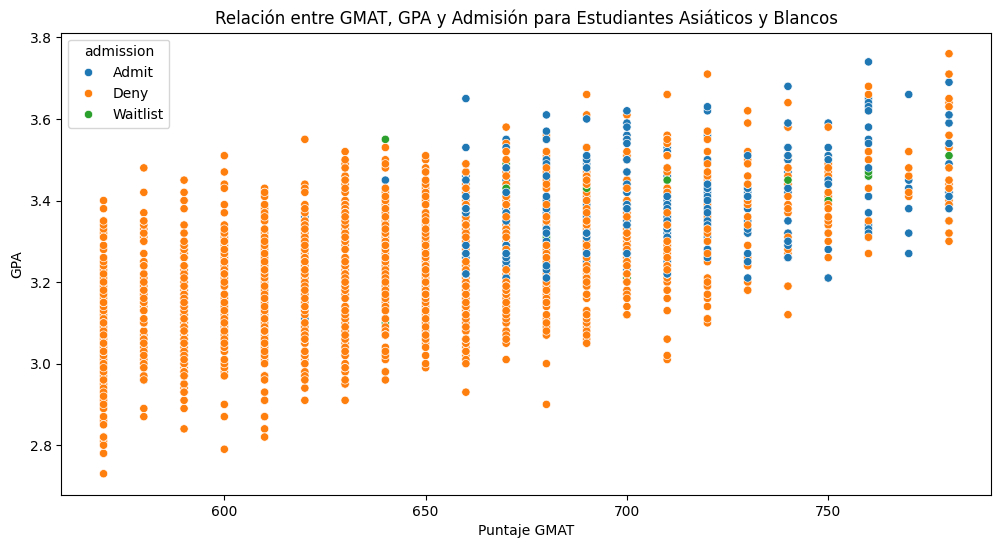

Tasa de admisión para estudiantes asiáticos y blancos con alto GMAT y GPA: 46.32%


In [90]:
# Los estudiantes asiáticos y blancos con buenos puntajes en el GMAT y GPA altos tienen una mayor probabilidad de ser admitidos.

# Filtrar por estudiantes asiáticos y blancos
asian_white_students = df[(df['race'] == 'Asian') | (df['race'] == 'White')]

# Crear un diagrama de dispersión para visualizar la relación entre GMAT, GPA y admisión para estudiantes asiáticos y blancos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gmat', y='gpa', hue='admission', data=asian_white_students)
plt.title('Relación entre GMAT, GPA y Admisión para Estudiantes Asiáticos y Blancos')
plt.xlabel('Puntaje GMAT')
plt.ylabel('GPA')
plt.show()

# Calcular la tasa de admisión para estudiantes asiáticos y blancos con altos puntajes de GMAT y GPA
high_gmat_gpa_asian_white = asian_white_students[(asian_white_students['gmat'] >= 700) & (asian_white_students['gpa'] >= 3.5)]
admitted_high_gmat_gpa_asian_white = high_gmat_gpa_asian_white[high_gmat_gpa_asian_white['admission'] == 'Admit'].shape[0]
total_high_gmat_gpa_asian_white = high_gmat_gpa_asian_white.shape[0]

if total_high_gmat_gpa_asian_white > 0:
  admission_rate_high_gmat_gpa_asian_white = (admitted_high_gmat_gpa_asian_white / total_high_gmat_gpa_asian_white) * 100
  print(f"Tasa de admisión para estudiantes asiáticos y blancos con alto GMAT y GPA: {admission_rate_high_gmat_gpa_asian_white:.2f}%")
else:
  print("No hay estudiantes asiáticos y blancos con alto GMAT y GPA en el conjunto de datos.")


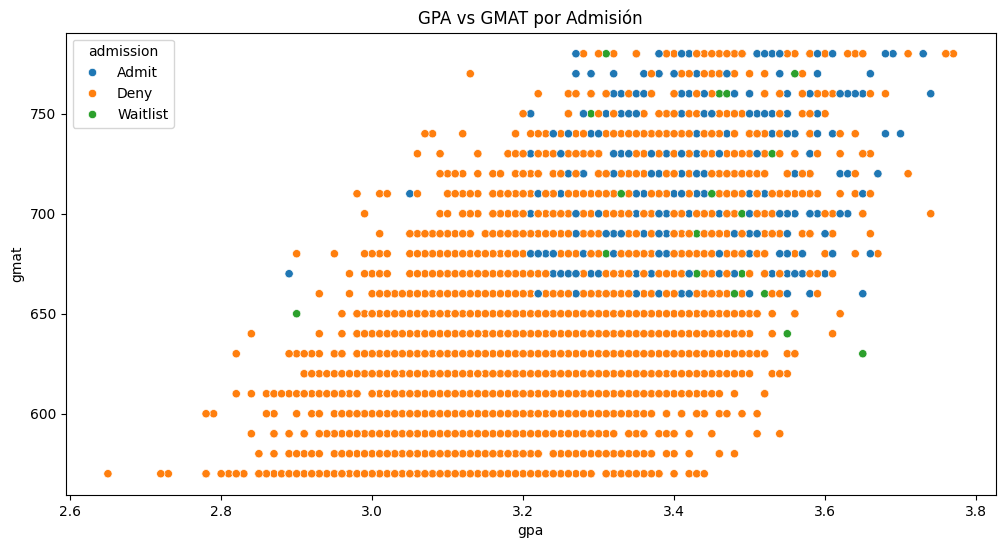

In [83]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gpa', y='gmat', hue='admission', data=df)
plt.title('GPA vs GMAT por Admisión')
plt.show()